In [467]:
# Importing pandas along with other libraries for loading DataFrame

In [468]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [469]:
df=pd.read_csv('bigdatamart_Train.csv')

In [470]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [471]:
df.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT04

In [472]:
df.shape

(8523, 12)

In [473]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [474]:
# CHecking missing values

In [475]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [476]:
# Using simple imputer filling missing values

In [477]:
from sklearn.impute import SimpleImputer

In [478]:
si=SimpleImputer()

In [479]:
df['Item_Weight']=si.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [480]:
sii=SimpleImputer(strategy='most_frequent')

In [481]:
df['Outlet_Size']=sii.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [482]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [483]:
from sklearn.preprocessing import LabelEncoder

In [484]:
le=LabelEncoder()

In [485]:
list1=('Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type')
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    

In [486]:
# Checking duplicate values

In [487]:
df.duplicated().sum()

0

In [488]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [489]:
#statistical summary of Data

In [490]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [491]:
# CHecking correlation

In [492]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


In [493]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Fat_Content             0.009800
Item_Weight                  0.011550
Item_Type                    0.017048
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

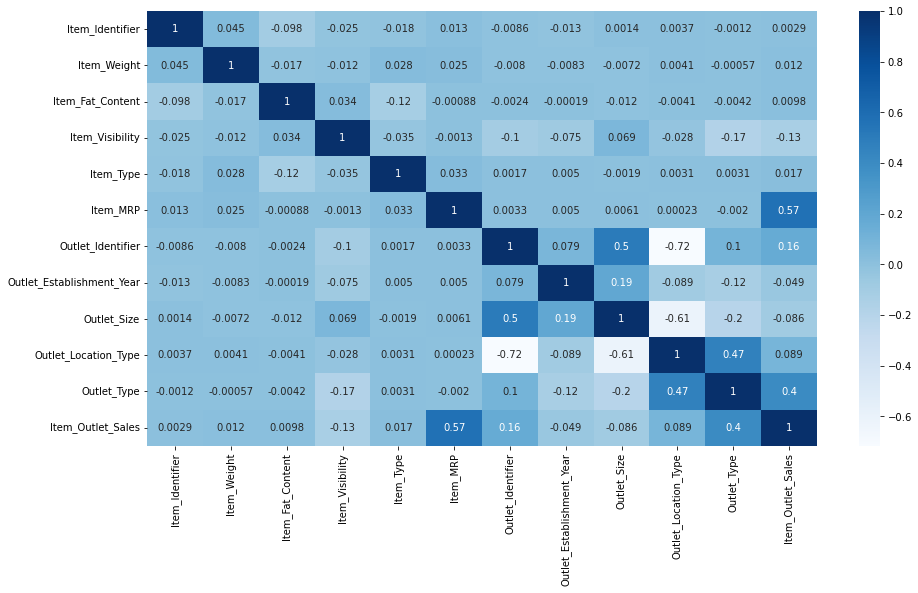

In [494]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [495]:
df.skew().sort_values(ascending=False)

Item_Outlet_Sales            1.177531
Item_Visibility              1.167091
Item_Fat_Content             0.994824
Outlet_Type                  0.927438
Item_MRP                     0.127202
Item_Type                    0.101655
Item_Weight                  0.090561
Item_Identifier             -0.008877
Outlet_Identifier           -0.059861
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Establishment_Year   -0.396641
dtype: float64

In [496]:
# Bivariate analyising of Data

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

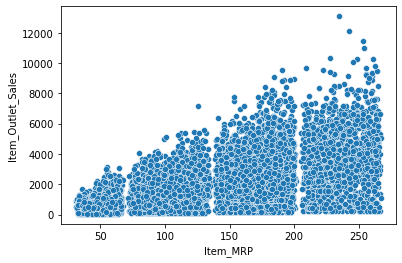

In [497]:
sns.scatterplot(y=df['Item_Outlet_Sales'],x=df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

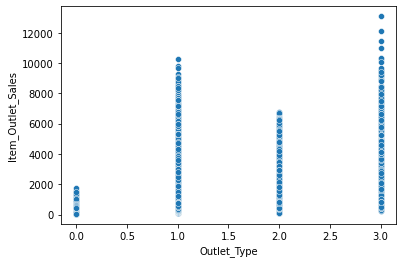

In [498]:
sns.scatterplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

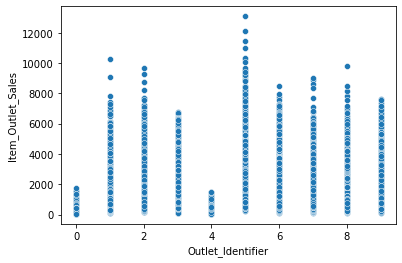

In [499]:
sns.scatterplot(x=df['Outlet_Identifier'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

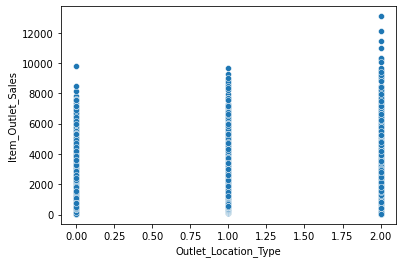

In [500]:
sns.scatterplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

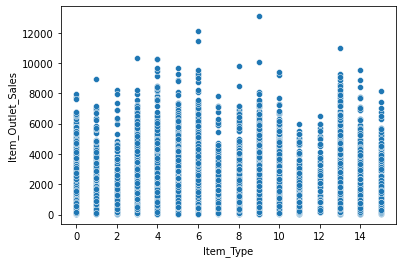

In [501]:
sns.scatterplot(x=df['Item_Type'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

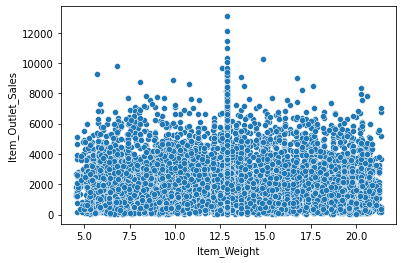

In [502]:
sns.scatterplot(x=df['Item_Weight'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

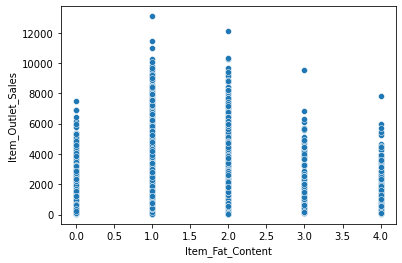

In [503]:
sns.scatterplot(x=df['Item_Fat_Content'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

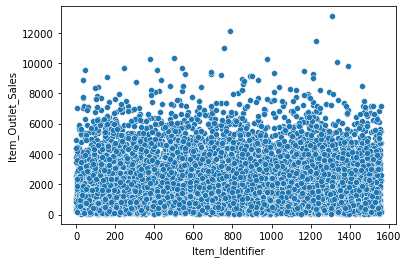

In [504]:
sns.scatterplot(x=df['Item_Identifier'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

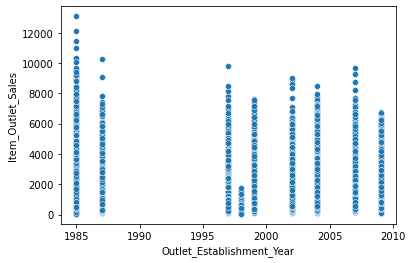

In [505]:
sns.scatterplot(x=df['Outlet_Establishment_Year'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

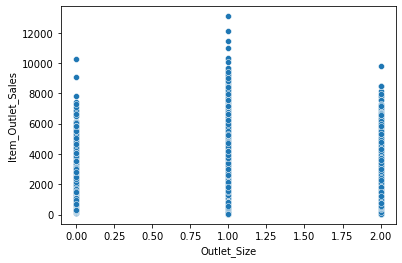

In [506]:
sns.scatterplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

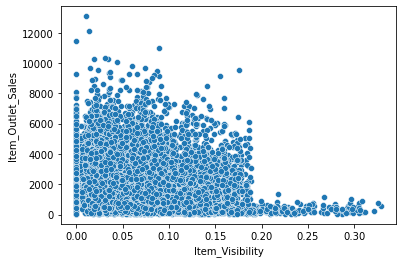

In [507]:
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])

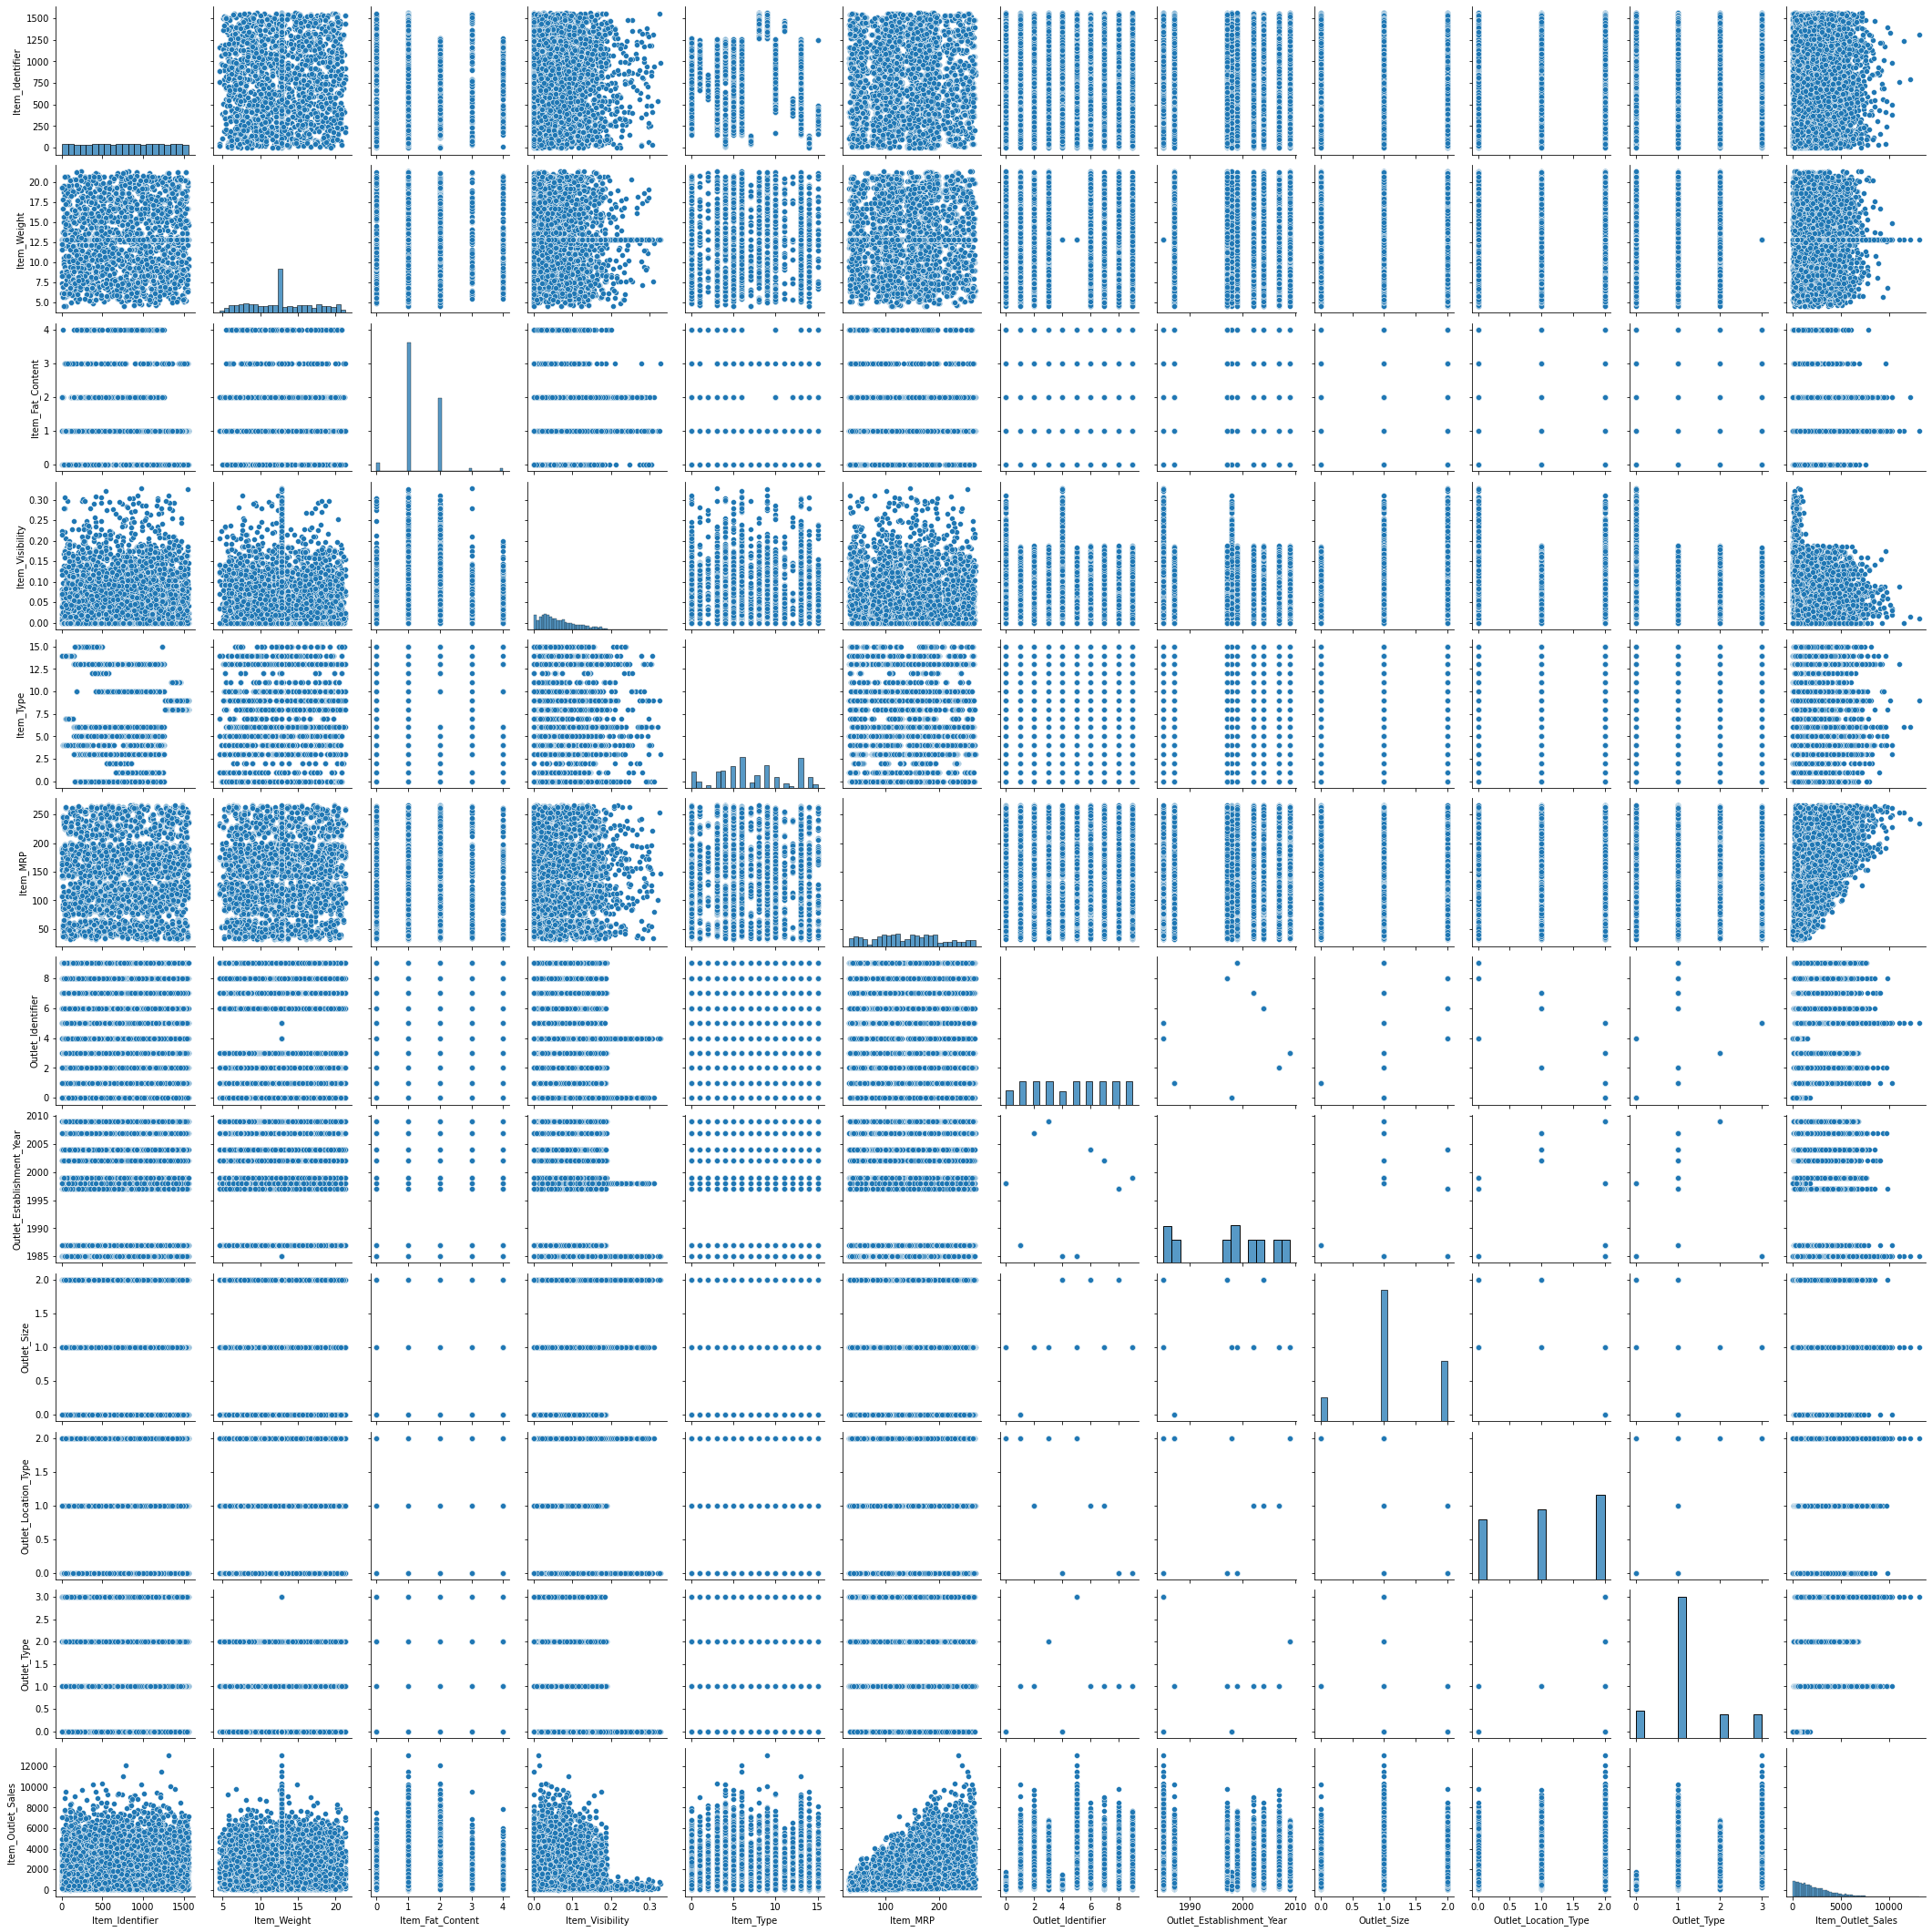

In [508]:
sns.pairplot(df)

In [509]:
# Checking Distribution graph of data

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

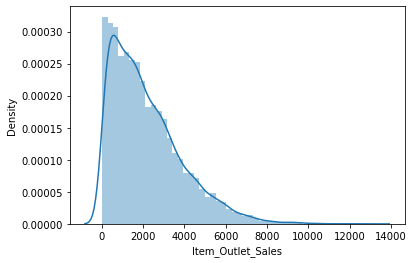

In [510]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

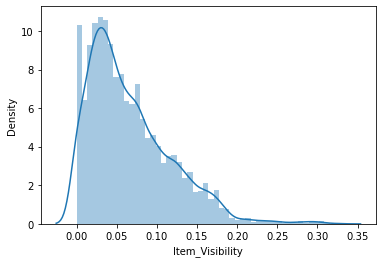

In [511]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

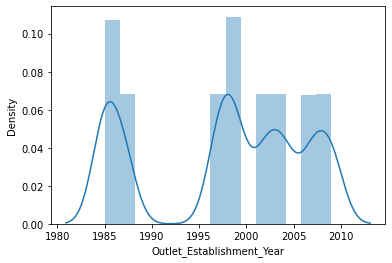

In [512]:
sns.distplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

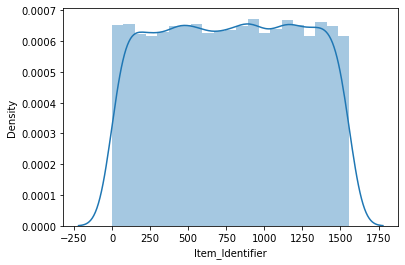

In [513]:
sns.distplot(df['Item_Identifier'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

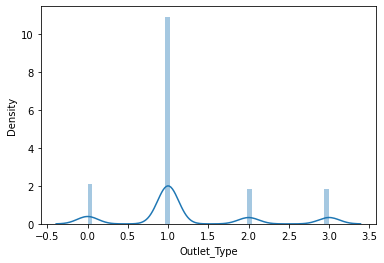

In [514]:
sns.distplot(df['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

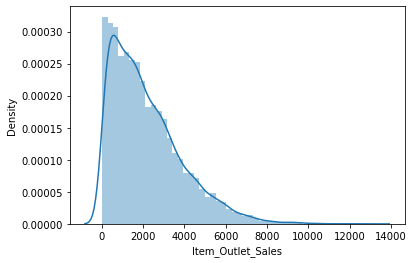

In [515]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

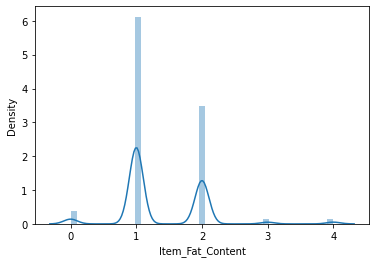

In [516]:
sns.distplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

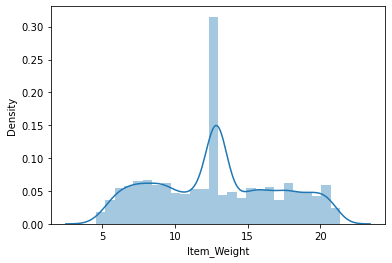

In [517]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

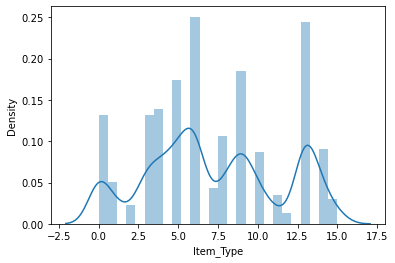

In [518]:
sns.distplot(df['Item_Type'])

In [519]:
# Checking Outliers through Visualization

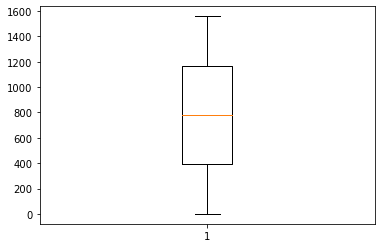

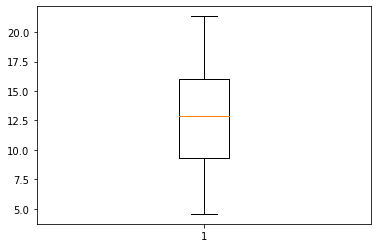

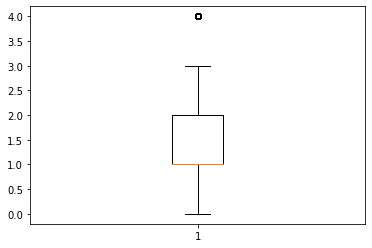

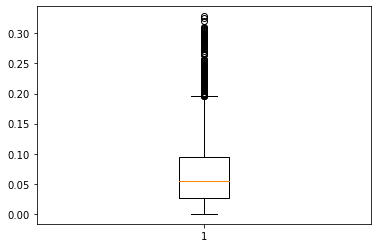

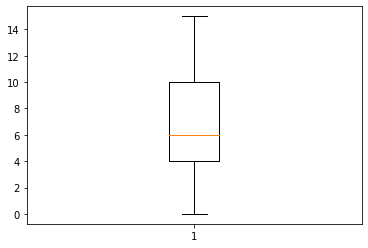

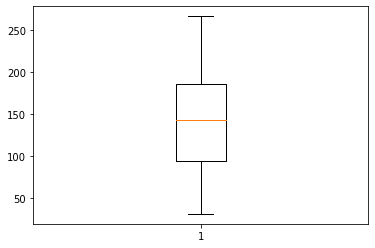

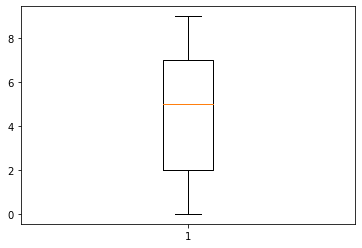

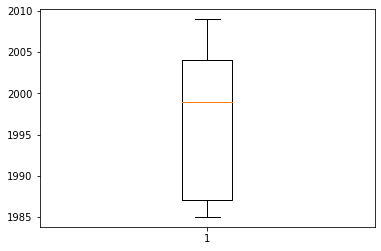

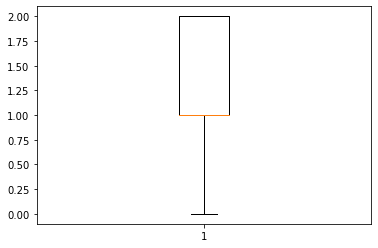

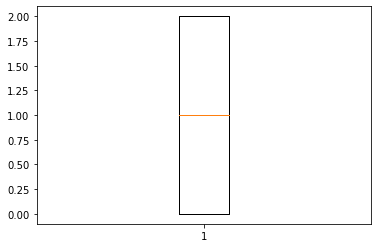

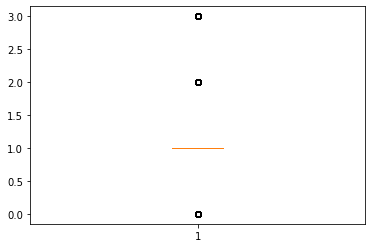

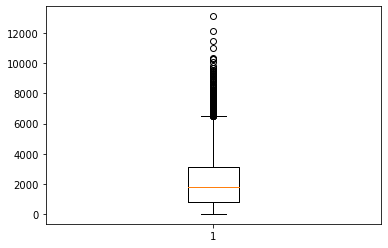

In [520]:
list2=(df.columns)
for i in list2:
    plt.boxplot(df[i])
    plt.show()

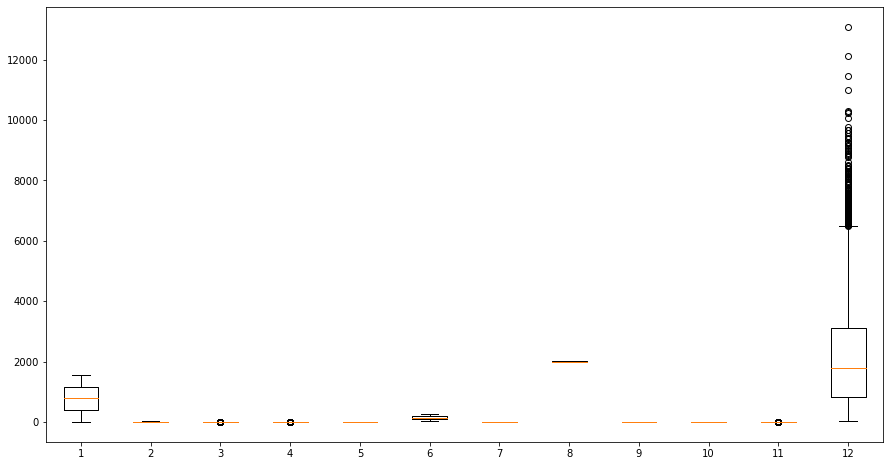

In [521]:
plt.figure(figsize=(15,8))
plt.boxplot(df)
plt.show()

In [522]:
from scipy.stats import zscore

In [523]:
# Removing Outliers using Zscore

In [524]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [525]:
df=df[(z<3).all(axis=1)]

In [526]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [527]:
x1=df.iloc[:,:-1]
x1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [528]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [529]:
# Checking Multicollinerity and droping corrosponding column for high multicolinearity

In [530]:
def cal_vif(x1):
    vif=pd.DataFrame()
    vif['variables']=x1.columns
    vif['vif']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [531]:
cal_vif(x1)

,variables,vif
0,Item_Identifier,4.051112
1,Item_Weight,10.186728
2,Item_Fat_Content,6.678151
3,Item_Visibility,2.890933
4,Item_Type,4.041505
5,Item_MRP,6.144651
6,Outlet_Identifier,15.614747
7,Outlet_Establishment_Year,63.280180
8,Outlet_Size,7.840381
9,Outlet_Location_Type,16.614472


In [532]:
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [533]:
# Seperating data x and y

In [572]:
x=df.iloc[:,:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,1,2,2


In [573]:
y=df.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [574]:
# Removing SKewness 

In [575]:
pt=PowerTransformer()
x_new=pt.fit_transform(x)

In [576]:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=False)

Item_Visibility         0.116318
Item_Fat_Content        0.017038
Outlet_Type             0.010506
Outlet_Size            -0.044624
Item_Weight            -0.069934
Item_MRP               -0.112220
Item_Type              -0.166116
Outlet_Identifier      -0.215616
Outlet_Location_Type   -0.216697
Item_Identifier        -0.296537
dtype: float64

In [577]:
x=pd.DataFrame(x_new,columns=x.columns)

In [578]:
from sklearn.preprocessing import PowerTransformer

In [579]:
st=StandardScaler()
x=st.fit_transform(x)

In [580]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score

In [581]:
lr=LinearRegression()

In [582]:
# Checking Best Random State

In [584]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    lracc=r2_score(y_test,predlr)
    print('At random state ',i,' accuracy of Linear Regression is ',lracc*100)

At random state  0  accuracy of Linear Regression is  51.56174144019599
At random state  1  accuracy of Linear Regression is  50.88223764353946
At random state  2  accuracy of Linear Regression is  51.741759549188004
At random state  3  accuracy of Linear Regression is  50.53704267431076
At random state  4  accuracy of Linear Regression is  53.20465952054833
At random state  5  accuracy of Linear Regression is  49.32597963249342
At random state  6  accuracy of Linear Regression is  55.03811135135324
At random state  7  accuracy of Linear Regression is  49.93607346757308
At random state  8  accuracy of Linear Regression is  51.633961822374985
At random state  9  accuracy of Linear Regression is  52.535620877057184
At random state  10  accuracy of Linear Regression is  51.63963826975275
At random state  11  accuracy of Linear Regression is  51.716797386311654
At random state  12  accuracy of Linear Regression is  51.89973263824943
At random state  13  accuracy of Linear Regression is  50

In [585]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
lracc=r2_score(y_test,predlr)
print('At random state 6 accuracy of Linear Regression is ',lracc*100)

At random state 6 accuracy of Linear Regression is  55.03811135135324


In [586]:
from sklearn.model_selection import cross_val_score

In [587]:
for i in range(2,10):
    cvlr=cross_val_score(lr,x,y,cv=i)
    cvlr_mean=cvlr.mean()
    print('At cv ',i,' cross val score is ',cvlr_mean*100,' With Linear Regression Accuracy ',lracc*100)

At cv  2  cross val score is  51.34789187495734  With Linear Regression Accuracy  55.03811135135324
At cv  3  cross val score is  51.36481966029599  With Linear Regression Accuracy  55.03811135135324
At cv  4  cross val score is  51.259780897260185  With Linear Regression Accuracy  55.03811135135324
At cv  5  cross val score is  51.33806936693581  With Linear Regression Accuracy  55.03811135135324
At cv  6  cross val score is  51.368835871504594  With Linear Regression Accuracy  55.03811135135324
At cv  7  cross val score is  51.38939172062527  With Linear Regression Accuracy  55.03811135135324
At cv  8  cross val score is  51.349241041775514  With Linear Regression Accuracy  55.03811135135324
At cv  9  cross val score is  51.35294922736611  With Linear Regression Accuracy  55.03811135135324


In [548]:
#Checking cross validation score for linear regression model

In [588]:
cvlr=cross_val_score(lr,x,y,cv=7)
cvlr_mean=cvlr.mean()
print('At cv 7 cross val score is ',cvlr_mean*100,' With Linear Regression Accuracy ',lracc*100)

At cv 7 cross val score is  51.38939172062527  With Linear Regression Accuracy  55.03811135135324


In [589]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [590]:
ls=Lasso()
rg=Ridge()
en=ElasticNet()

In [591]:
#creating a function to find best parameters for Lasso ridge and elastic net using grid search cv

In [592]:
model=[ls,rg,en]
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
for i in model:
    gs=GridSearchCV(i,parameters)
    gs.fit(x_train,y_train)
    print("Best parameter for ",i,' is ',gs.best_params_)

Best parameter for  Lasso()  is  {'alpha': 10, 'random_state': 0}
Best parameter for  Ridge()  is  {'alpha': 10, 'random_state': 0}
Best parameter for  ElasticNet()  is  {'alpha': 0.01, 'random_state': 0}


In [593]:
ls=Lasso(alpha=10,random_state=0)
rg=Ridge(alpha=10,random_state=0)
en=ElasticNet(alpha=0.01,random_state=0)

In [594]:
# Checking accuracy with cross val score of lasso with best cv

In [595]:
ls.fit(x_train,y_train)
lspred=ls.predict(x_test)
lsacc=r2_score(y_test,lspred)
for i in range(2,10):
    cvls=cross_val_score(ls,x,y,cv=i)
    cvls_mean=cvls.mean()
    print('At cv ',i,' cross val score is ',cvls_mean*100,' with Lasso accuracy ',lsacc*100)

At cv  2  cross val score is  51.357546940784815  with Lasso accuracy  55.053991586273156
At cv  3  cross val score is  51.34770563203227  with Lasso accuracy  55.053991586273156
At cv  4  cross val score is  51.28694449221813  with Lasso accuracy  55.053991586273156
At cv  5  cross val score is  51.32134785678121  with Lasso accuracy  55.053991586273156
At cv  6  cross val score is  51.38166882285139  with Lasso accuracy  55.053991586273156
At cv  7  cross val score is  51.37912304629788  with Lasso accuracy  55.053991586273156
At cv  8  cross val score is  51.35824248302634  with Lasso accuracy  55.053991586273156
At cv  9  cross val score is  51.34719619104037  with Lasso accuracy  55.053991586273156


In [596]:
cvls=cross_val_score(ls,x,y,cv=6)
cvls_mean=cvls.mean()
print('At cv 6 cross val score is ',cvls_mean*100,' with Lasso accuracy ',lsacc*100)

At cv 6 cross val score is  51.38166882285139  with Lasso accuracy  55.053991586273156


In [597]:
# Checking accuracy with cross val score of ridge with best cv

In [598]:
rg.fit(x_train,y_train)
rgpred=rg.predict(x_test)
rgacc=r2_score(y_test,rgpred)
for i in range(2,10):
    cvrg=cross_val_score(rg,x,y,cv=i)
    cvrg_mean=cvrg.mean()
    print('At cv ',i,' cross val score is ',cvrg_mean*100,' with Ridge accuracy ',rgacc*100)

At cv  2  cross val score is  51.34929244358417  with Ridge accuracy  55.0416388581773
At cv  3  cross val score is  51.36551462218863  with Ridge accuracy  55.0416388581773
At cv  4  cross val score is  51.260613947380065  with Ridge accuracy  55.0416388581773
At cv  5  cross val score is  51.3386654405287  with Ridge accuracy  55.0416388581773
At cv  6  cross val score is  51.36921774305051  with Ridge accuracy  55.0416388581773
At cv  7  cross val score is  51.38973384100003  with Ridge accuracy  55.0416388581773
At cv  8  cross val score is  51.34973570551424  with Ridge accuracy  55.0416388581773
At cv  9  cross val score is  51.35316972797437  with Ridge accuracy  55.0416388581773


In [599]:
cvrg=cross_val_score(rg,x,y,cv=7)
cvrg_mean=cvrg.mean()
print('At cv 7 cross val score is ',cvrg_mean*100,' with Ridge accuracy ',rgacc*100)

At cv 7 cross val score is  51.38973384100003  with Ridge accuracy  55.0416388581773


In [600]:
# Checking accuracy with cross val score of ElasticNet with best cv

In [601]:
en.fit(x_train,y_train)
enpred=en.predict(x_test)
enacc=r2_score(y_test,enpred)
for i in range(2,10):
    cven=cross_val_score(en,x,y,cv=i)
    cven_mean=cven.mean()
    print('At cv ',i,' cross val score is ',cven_mean*100,' with ElasticNet accuracy ',enacc*100)

At cv  2  cross val score is  51.349333476576575  with ElasticNet accuracy  55.04670749587726
At cv  3  cross val score is  51.364966893333715  with ElasticNet accuracy  55.04670749587726
At cv  4  cross val score is  51.26052372705556  with ElasticNet accuracy  55.04670749587726
At cv  5  cross val score is  51.33812814515151  with ElasticNet accuracy  55.04670749587726
At cv  6  cross val score is  51.368238193609685  with ElasticNet accuracy  55.04670749587726
At cv  7  cross val score is  51.38866423913825  with ElasticNet accuracy  55.04670749587726
At cv  8  cross val score is  51.349072455194545  with ElasticNet accuracy  55.04670749587726
At cv  9  cross val score is  51.35180855145498  with ElasticNet accuracy  55.04670749587726


In [602]:
cven=cross_val_score(en,x,y,cv=7)
cven_mean=cven.mean()
print('At cv 2 cross val score is ',cven_mean*100,' with ElasticNet accuracy ',enacc*100)

At cv 2 cross val score is  51.38866423913825  with ElasticNet accuracy  55.04670749587726


In [603]:
from sklearn.ensemble import RandomForestRegressor

In [604]:
rf=RandomForestRegressor()

In [605]:
# Using GridSeachCV finding best parameters for random forest regressor

In [606]:
parameters={'criterion':['squared_error','absolute_error','poisson'],'max_features':['auto','sqrt','log2']}
gvrf=GridSearchCV(rf,parameters)
gvrf.fit(x_train,y_train)
print(gvrf.best_params_)

{'criterion': 'absolute_error', 'max_features': 'sqrt'}


In [435]:
rf=RandomForestRegressor(criterion='poisson',max_features='sqrt')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rfacc=r2_score(y_test,predrf)
for i in range(2,10):
    cvrf=cross_val_score(rf,x,y,cv=i)
    cvrf_mean=cvrf.mean()
    print('At cv ',i,' cross val score is ',cvrf_mean*100,' with RandomForestRegressor Accuracy ',rfacc*100)

At cv  2  cross val score is  55.53065328481039  with RandomForestRegressor Accuracy  61.508540266045166
At cv  3  cross val score is  55.82544984103662  with RandomForestRegressor Accuracy  61.508540266045166
At cv  4  cross val score is  55.70842911481535  with RandomForestRegressor Accuracy  61.508540266045166
At cv  5  cross val score is  55.64794787847853  with RandomForestRegressor Accuracy  61.508540266045166
At cv  6  cross val score is  56.184621897380126  with RandomForestRegressor Accuracy  61.508540266045166
At cv  7  cross val score is  55.8817945308531  with RandomForestRegressor Accuracy  61.508540266045166
At cv  8  cross val score is  55.87718679306421  with RandomForestRegressor Accuracy  61.508540266045166
At cv  9  cross val score is  55.72633224649288  with RandomForestRegressor Accuracy  61.508540266045166


In [559]:
# Checking accuracy with cross val score of Random Forest Regressor with best cv

In [436]:
cvrf=cross_val_score(rf,x,y,cv=7)
cvrf_mean=cvrf.mean()
print('At cv 7 cross val score is ',cvrf_mean*100,' with RandomForestRegressor Accuracy ',rfacc*100)

At cv 7 cross val score is  55.84888211429213  with RandomForestRegressor Accuracy  61.508540266045166


In [437]:
from sklearn.ensemble import AdaBoostRegressor

In [560]:
# Using AdaBoostRegressor Along with GridSearchCV for best Parameters

In [438]:
abr=AdaBoostRegressor()
parameters={'loss':['linear','square','exponential']}
gvabr=GridSearchCV(abr,parameters)
gvabr.fit(x_train,y_train)
print(gvabr.best_params_)

{'loss': 'linear'}


In [444]:
abr=AdaBoostRegressor(loss='linear')
abr.fit(x_train,y_train)
predabr=abr.predict(x_test)
abracc=r2_score(y_test,predabr)
for i in range(2,10):
    cvabr=cross_val_score(abr,x,y,cv=i)
    cvabr_mean=cvabr.mean()
    print('At cv ',i,' cross val score is ',cvabr_mean*100,' with AdaBoost Accuracy ',abracc*100)

At cv  2  cross val score is  55.2990888853847  with AdaBoost Accuracy  61.65892878191179
At cv  3  cross val score is  54.95670875444968  with AdaBoost Accuracy  61.65892878191179
At cv  4  cross val score is  55.287551412422964  with AdaBoost Accuracy  61.65892878191179
At cv  5  cross val score is  54.98744616435677  with AdaBoost Accuracy  61.65892878191179
At cv  6  cross val score is  55.0341213703751  with AdaBoost Accuracy  61.65892878191179
At cv  7  cross val score is  55.296393905124454  with AdaBoost Accuracy  61.65892878191179
At cv  8  cross val score is  55.70831451433133  with AdaBoost Accuracy  61.65892878191179
At cv  9  cross val score is  55.36196179978723  with AdaBoost Accuracy  61.65892878191179


In [561]:
# Checking accuracy with cross val score of AdaBoostRegressor with best cv

In [445]:
cvabr=cross_val_score(abr,x,y,cv=8)
cvabr_mean=cvabr.mean()
print('At cv 8 cross val score is ',cvabr_mean*100,' with AdaBoost Accuracy ',abracc*100)

At cv 8 cross val score is  55.65714159507782  with AdaBoost Accuracy  61.65892878191179


In [607]:
# At cv 7 cross val score is  51.38939172062527  With Linear Regression Accuracy  55.03811135135324
# At cv 6 cross val score is  51.38166882285139  with Lasso accuracy  55.053991586273156
# At cv 7 cross val score is  51.38973384100003  with Ridge accuracy  55.0416388581773
# At cv 2 cross val score is  51.38866423913825  with ElasticNet accuracy  55.04670749587726
# At cv 7 cross val score is  55.84888211429213  with RandomForestRegressor Accuracy  61.508540266045166
# At cv 8 cross val score is  55.65714159507782  with AdaBoost Accuracy  61.65892878191179

In [608]:
# Based on the Gap between CV and R2_Score accuracy, Linear Regression model sould be best 

In [609]:
import pickle
filename='bdm.pkl'
pickle.dump(lr,open(filename,'wb'))

In [610]:
output=pickle.load(open('bdm.pkl','rb'))
result=output.score(x_test,y_test)
result*100

55.03811135135324

In [611]:
datamartmodel=pd.DataFrame([output.predict(x_test)[:],(predrf)[:]],index=['original','predicted'])
datamartmodel

,0,1,2,3,4,5,6,7,8,9,...,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644
original,-1182.657064,1366.272246,1879.302099,3511.210434,1905.261261,3999.72685,4034.536484,1594.150931,2464.554463,2531.539659,...,1773.788025,3052.388408,2325.404353,1334.413313,1527.03036,2481.040487,3689.016483,851.076968,1809.963731,166.898057
predicted,93.944380,1470.179612,524.590478,4299.436790,1342.359328,4480.53439,3094.085786,1781.101554,2184.569696,2621.813872,...,1345.741592,3259.550402,2115.219968,1425.537722,1473.54856,2914.146678,3335.518182,864.508010,1831.782250,688.257434
